# Make sure to add the mids-w210-capstone folder to your drive

### Imports and globals

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/mids-w210-capstone/notebooks/
%pwd

'/Users/hassansaad/Documents/W210/LAWN_PROJECT/gmaps_data/working_dir'

In [2]:
#standard imports
import os
import sys
import time
import random

# data imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#image lib import
from PIL import Image
from skimage.transform import resize

# Model imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, datasets, models


In [19]:
IMAGES_DIR = '../classified_images/'
# IMAGES_DIR = '../datasets/GoogleMaps/temp/classified_images/'
LAWN_DIR = 'lawn/'
NO_LAWN_DIR = 'no_lawn/'

lawn_path = os.path.join(IMAGES_DIR, LAWN_DIR)
no_lawn_path = os.path.join(IMAGES_DIR, NO_LAWN_DIR)

DIM = 200

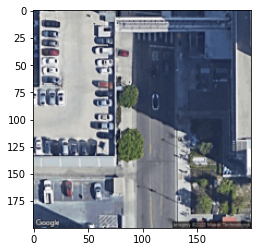

In [20]:
images = os.listdir(lawn_path)
test_image = Image.open(f'{lawn_path}/{images[0]}')
test = resize(np.array(test_image.convert('RGB')), (DIM,DIM,3))
plt.imshow(test)

In [22]:
positive_data = []
negative_data = []

In [23]:
for i in os.listdir(no_lawn_path):
  if i[-3:] == 'png':
    im = Image.open(f'{no_lawn_path}/{i}').convert('RGB')
    im_resized = resize(np.array(im), (DIM,DIM,3))
    negative_data.append((im_resized,0))

In [24]:
for i in os.listdir(lawn_path):
  if i[-3:] == 'png':
    im = Image.open(f'{lawn_path}/{i}').convert('RGB')
    im_resized = resize(np.array(im), (DIM,DIM,3))
    positive_data.append((im_resized,1))

In [25]:
positive_data[0][0].shape

(200, 200, 3)

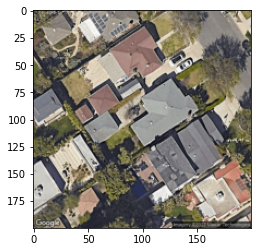

In [26]:
plt.imshow(positive_data[50][0])

In [58]:
resize(positive_data[50][0], (50,50,3)).shape

(50, 50, 3)

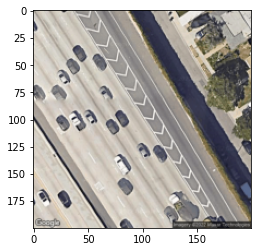

In [27]:
plt.imshow(negative_data[50][0])

In [28]:
all_data = positive_data+negative_data
random.shuffle(all_data)

In [29]:
X = np.array([i[0] for i in all_data])
y = np.array([i[1] for i in all_data])

In [30]:
X.shape, y.shape

((2642, 200, 200, 3), (2642,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y)

In [32]:
X_train.shape

(2113, 200, 200, 3)

In [33]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [34]:
y_train.shape, y_test.shape

((2113, 1), (529, 1))

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(DIM,DIM, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 20)        3620      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 20)       0

In [37]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20


/Users/hassansaad/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


67/67 [==============================] - 10s 146ms/step - loss: 0.6677 - accuracy: 0.5812 - val_loss: 0.8548 - val_accuracy: 0.4820
Epoch 2/20
67/67 [==============================] - 10s 147ms/step - loss: 0.6572 - accuracy: 0.6006 - val_loss: 0.7068 - val_accuracy: 0.4839
Epoch 3/20
67/67 [==============================] - 10s 146ms/step - loss: 0.6143 - accuracy: 0.6701 - val_loss: 0.6449 - val_accuracy: 0.5898
Epoch 4/20
67/67 [==============================] - 10s 147ms/step - loss: 0.5276 - accuracy: 0.7421 - val_loss: 0.6487 - val_accuracy: 0.6219
Epoch 5/20
67/67 [==============================] - 10s 146ms/step - loss: 0.5841 - accuracy: 0.7033 - val_loss: 0.5206 - val_accuracy: 0.7353
Epoch 6/20
67/67 [==============================] - 10s 147ms/step - loss: 0.4405 - accuracy: 0.8027 - val_loss: 0.8229 - val_accuracy: 0.5652
Epoch 7/20
67/67 [==============================] - 10s 147ms/step - loss: 0.4749 - accuracy: 0.7795 - val_loss: 0.6454 - val_accuracy: 0.6994
Epoch 8/20

In [39]:
pred = (model.predict(X_test) > 0.5).astype('int64').reshape(-1)

In [40]:
f1_score(y_test, pred)

0.7914438502673796

In [ ]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [41]:
model.save('saved_model/cnn_model')

INFO:tensorflow:Assets written to: saved_model/cnn_model/assets


In [42]:
model2 = tf.keras.models.load_model('saved_model/cnn_model')

In [43]:
model2.predict(X_test)

array([[2.21639514e-01],
       [6.29898310e-02],
       [9.99971390e-01],
       [6.12963617e-01],
       [9.99771118e-01],
       [6.07877076e-02],
       [1.64008886e-01],
       [9.99889493e-01],
       [9.46346521e-02],
       [9.78639841e-01],
       [2.03880668e-03],
       [7.08364666e-01],
       [9.56042051e-01],
       [4.53793347e-01],
       [5.34060597e-03],
       [9.99991596e-01],
       [4.90429312e-01],
       [4.07553911e-02],
       [9.99996185e-01],
       [9.99549627e-01],
       [9.99995768e-01],
       [9.98761594e-01],
       [1.00000000e+00],
       [9.98725235e-01],
       [6.23828292e-01],
       [2.86170840e-03],
       [9.99577999e-01],
       [9.99874949e-01],
       [4.21255827e-03],
       [2.06684828e-01],
       [4.99824584e-02],
       [9.99826550e-01],
       [2.20149755e-04],
       [1.47154497e-05],
       [9.99997735e-01],
       [9.59595442e-02],
       [3.74746621e-01],
       [9.57583308e-01],
       [8.37698053e-07],
       [9.99993205e-01],


In [62]:
model2.predict(X_test[0:2].reshape(-1,200,200,3))

array([[0.22163951],
       [0.06298983]], dtype=float32)

In [64]:
X_test[0:5].reshape(-1,200,200,3).shape

(5, 200, 200, 3)